# Análise dos dados coletados do Spotify
### Coleta realizada em: 

##### Trabalho de Conclusão de Curso - TCC


### Importação das bibliotecas e do arquivo 'dataframefinal.csv'

In [51]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Função definida para normalizar os valores
from sklearn.preprocessing import StandardScaler
def normalizar(array):
    standarlization = StandardScaler()
    return standarlization.fit_transform(array)

In [3]:
# Função para retornar um gráfito do método Elbow, com a finalidade de identificar a quantidade ideal de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def calculoElbow(array):
    wcss = []

    for i in range(1,10):
        kmeans = KMeans(n_clusters=i, init='random')
        kmeans.fit(array)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1,10),wcss)
    plt.title('O Metodo Elbow')
    plt.xlabel('numero de Clusters')
    plt.ylabel('WSS')
    plt.show()
    

In [4]:
# Leitura do arquivo
df = pd.read_csv('dataframefinal.csv')
# Remoção de colunas nao utilizadas para a análise
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', '_id', 'album', 'available_markets',
                      'disc_number','episode', 'uri', 'href', 'id', 'linked_from', 
                      'type', 'explicit','external_ids','external_urls','is_local', 'preview_url',
                     'track_number', 'track'])
# remoção de tuplas com valores NaN
df = df.dropna()
print('Tamanho do Dataframe: %d músicas' % len(df))

Tamanho do Dataframe: 42142 músicas


/home/adriano/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Jorge & Mateus,toplists,BR,175219,Tijolão - Ao Vivo,0,0.637,0.877,-3.680,0.1980,0.469,0.0,0.3430,0.691,118.889
1,Ed Sheeran,toplists,BR,206186,Cross Me (feat. Chance the Rapper & PnB Rock),0,0.746,0.787,-6.373,0.1200,0.214,0.0,0.0669,0.607,95.005
2,Paula Fernandes,toplists,BR,204000,Juntos,63,0.687,0.411,-8.619,0.0338,0.866,0.0,0.0967,0.184,101.851
3,Diego & Victor Hugo,toplists,BR,190276,Entregador de Flor - Ao Vivo em Brasília,0,0.376,0.834,-4.303,0.0800,0.549,0.0,0.4120,0.329,125.171
4,Dennis DJ,toplists,BR,224368,Megamix do Baile,0,0.847,0.847,-6.920,0.3530,0.475,0.0,0.1180,0.741,149.947


In [6]:
# Identificação da quantidade de músicas por país
df.country.value_counts()

BR    17928
FR    13040
JP    11174
Name: country, dtype: int64

##### Análise em relação a danceability

In [7]:
X = df.loc[ :, ["danceability"]].values
X

array([[0.637],
       [0.746],
       [0.687],
       ...,
       [0.789],
       [0.272],
       [0.616]])

In [8]:
# Normalização da danceability
Xst = normalizar(X)
Xst

array([[ 0.23821444],
       [ 0.86320151],
       [ 0.52490576],
       ...,
       [ 1.10975605],
       [-1.85463217],
       [ 0.11780409]])

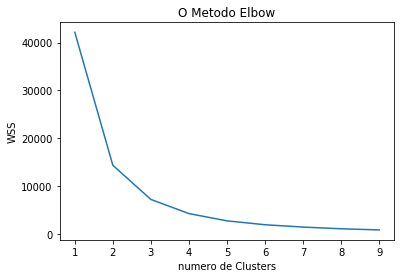

In [9]:
calculoElbow(Xst)

In [11]:
# Utilizando o Kmeans, é realizado a clusterização
# Ou seja, calculo a partir do vizinho mais próximo
# Então é mostrado o centro dos clursters
kmeans = KMeans(n_clusters=4)
kmeans.fit(Xst)
kmeans.cluster_centers_

array([[-0.7057707 ],
       [ 0.2428075 ],
       [ 1.13128994],
       [-1.96382033]])

In [33]:
# Clusterização
y_pred = KMeans(n_clusters=4).fit_predict(Xst)
df["cluster"] = y_pred
df.loc[ :, ["country", "cluster", "danceability"]].head()

,country,cluster,danceability
0,BR,2,0.637
1,BR,0,0.746
2,BR,2,0.687
3,BR,3,0.376
4,BR,0,0.847


#### Análise do Brasil

In [43]:
# Divisão do df para a análise do Brasil
dfbr = df[ dfAux.country == "BR"]

In [35]:
dfbr.cluster.value_counts()

2    6135
3    5124
0    4633
1    2036
Name: cluster, dtype: int64

In [40]:
# Divisão do dfbr em df para cada cluster
dfcl0 = dfbr[ dfbr.cluster == 0]
dfcl1 = dfbr[ dfbr.cluster == 1]
dfcl2 = dfbr[ dfbr.cluster == 2]
dfcl3 = dfbr[ dfbr.cluster == 3]

In [47]:
media = dfcl0.danceability.mean(), dfcl1.danceability.mean(), dfcl2.danceability.mean(), dfcl3.danceability.mean()
print(media)

(0.7924634146341467, 0.24624803536345835, 0.6340179299103524, 0.46570804059328624)


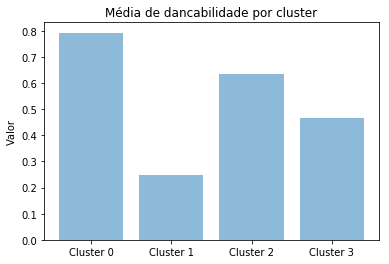

In [57]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = media

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de dancabilidade por cluster')

plt.show()

In [56]:
dfcl0.category.value_counts()[:10]

summer        447
party         388
hiphop        384
family        357
mood          294
edm_dance     292
popculture    283
sertanejo     231
pop           230
latin         223
Name: category, dtype: int64

In [46]:
dfcl1.category.value_counts()[:10]

inspirational    422
sleep            261
popculture       198
classical        167
focus            117
mood             113
chill            110
rock             108
indie_alt         74
gaming            67
Name: category, dtype: int64

In [58]:
dfcl2.category.value_counts()[:10]

mood             556
popculture       434
inspirational    408
edm_dance        404
family           401
sertanejo        360
summer           328
brazilian        319
rock             282
party            262
Name: category, dtype: int64

In [59]:
dfcl3.category.value_counts()[:10]

inspirational    1116
rock              432
mood              427
popculture        364
brazilian         182
summer            178
indie_alt         167
comedy            149
sessions          146
sertanejo         145
Name: category, dtype: int64

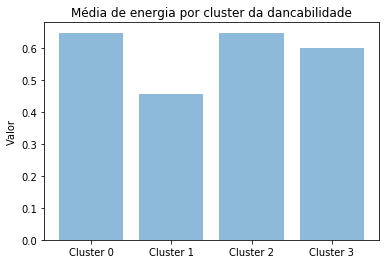

In [64]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.energy.mean(), dfcl1.energy.mean(), dfcl2.energy.mean(), dfcl3.energy.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de energia por cluster da dancabilidade')

plt.show()

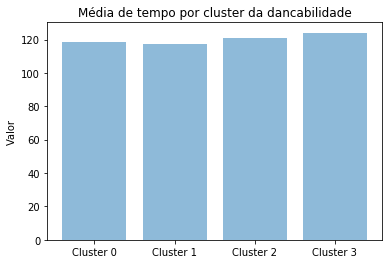

In [69]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.tempo.mean(), dfcl1.tempo.mean(), dfcl2.tempo.mean(), dfcl3.tempo.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de tempo por cluster da dancabilidade')

plt.show()

In [65]:
dfbr.columns

Index(['artists', 'category', 'country', 'duration_ms', 'name', 'popularity',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'cluster'],
      dtype='object')

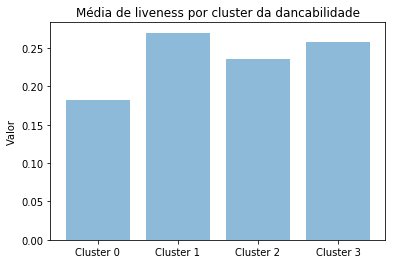

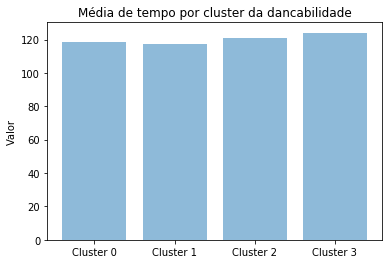

In [68]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.liveness.mean(), dfcl1.liveness.mean(), dfcl2.liveness.mean(), dfcl3.liveness.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de tempo por cluster da dancabilidade')

plt.show()